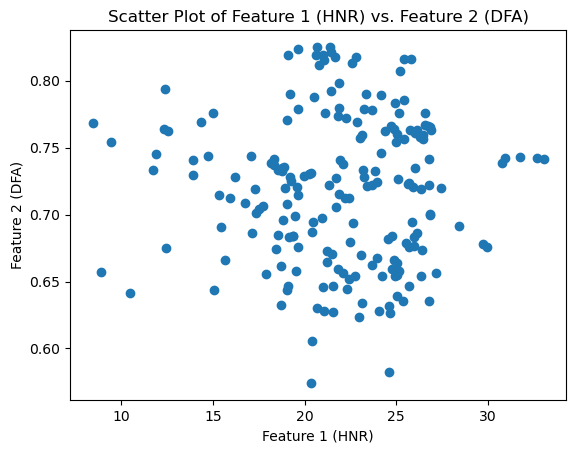

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from the Excel file
data = pd.read_excel('Parkisons Dataset 1 Final (2).xlsx')

# Extract the values for Feature A and Feature B
feature_1 = data['HNR']
feature_2 = data['DFA']

# Create a scatter plot
plt.scatter(feature_1, feature_2)

# Add labels and a title
plt.xlabel("Feature 1 (HNR)")
plt.ylabel("Feature 2 (DFA)")
plt.title("Scatter Plot of Feature 1 (HNR) vs. Feature 2 (DFA)")

# Show the plot
plt.show()

C:\Users\year3\AppData\Local\Temp\ipykernel_4228\1772414175.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


Coefficients: [1.22371755e-05]
Mean squared error: 0.00
Coefficient of determination: -0.03


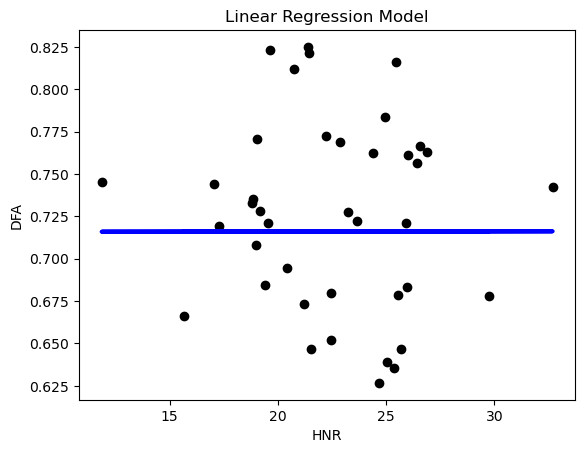

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming you've already loaded and cleaned your data
data = pd.read_excel('Parkisons Dataset 1 Final (2).xlsx')
data.isna().sum()
data.fillna(data.mean(), inplace=True)

# Define the independent and dependent variables
X = data[['HNR']]  # Independent variable
y = data['DFA']   # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients:", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is a perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel("HNR")
plt.ylabel("DFA")
plt.title("Linear Regression Model")

plt.show()